In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import regex as re
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import time

In [2]:
import wordcloud

In [3]:
df = pd.read_csv('final.csv')
df.head()

,author,id,selftext,title,subreddit_tifu,text,line_count
0,Funguy0623,cafv59,This LITERALLY just happened. I was on the pho...,TIFU by accidentally causing a cat to get run ...,1,TIFU by accidentally causing a cat to get run ...,2
1,Throwaway678495,82vog8,"So unlike many of the stories here, this one d...",TIFU by getting a girls phone number,1,TIFU by getting a girls phone number So unlike...,2
2,capj23,c3lqoh,"Obligatory, this happened 14 years ago and I w...",TIFU by climbing too far on my uncle,1,TIFU by climbing too far on my uncle Obligator...,8
3,dognass,cacjwi,"Right not sure how to go about this, but here ...",TIFU Dog and Ass,1,TIFU Dog and Ass Right not sure how to go abou...,16
4,SourBitchKids,caj1fz,I recently came into the possession of a new k...,TIFU by smoking too much weed and going into a...,1,TIFU by smoking too much weed and going into a...,4


In [4]:
df.text.sample(20)

1778    If the universe never existed - nothing - not ...
218     TIFU Update: I fucked up by not knowing the gu...
944     TIFU by accidentally humiliating an old friend...
1358    How do I get something out of my eye (lid)? I ...
2398    If a mosquito were to bite your eye (as in you...
31      TIFU by using my girlfriend's phone So this ha...
1528    How hard should I be working? I guess this is ...
1519    HELP Help I'm new to reddit and nobody lets me...
1267    My brother died in a power line accident, did ...
1795    Where do I buy normal earphones and what are t...
53      TIFU by going to work while on acid, thinking ...
1917    Isn't the award system of Reddit a scam? Doesn...
36      TIFU by drinking too much at after work event,...
1165    TIFU, I told My friend Something I Shouldnt Ha...
176     TIFU by letting two little girls play with my ...
800     TIFU My parents ate my cannabis cake  So here'...
616     TIFU by making my coworkers think I was going ...
1651    Why is

In [5]:
df.loc[462]

author                                                    [deleted]
id                                                           310zph
selftext          So I was sexing my hot girlfriend who I have l...
title             TIP BY SEXING MY HOT GIRLFRIEND REALLY HARD WI...
subreddit_tifu                                                    1
text              TIP BY SEXING MY HOT GIRLFRIEND REALLY HARD WI...
line_count                                                        1
Name: 462, dtype: object

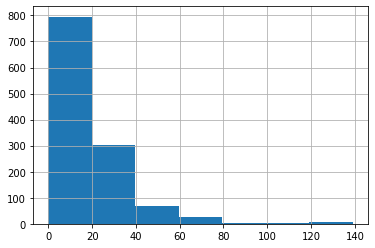

In [6]:
df[df['subreddit_tifu'] == 1]['line_count'].hist(bins = 7)

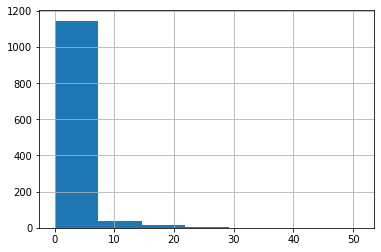

In [7]:
df[df['subreddit_tifu'] == 0]['line_count'].hist(bins = 7)

In [8]:
df.shape

(2400, 7)

## Two DataFrames, both alike in dignity

In [9]:
tifu = df[df['subreddit_tifu'] == 1]

In [10]:
nsq = df[df['subreddit_tifu'] == 0]

## Bag of words and their frequencies

In [11]:
def get_tokens(df_in):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = []
    for post in df_in['text']:
        tokens += tokenizer.tokenize(post.lower())
    return tokens

In [12]:
def get_word_count(words):
    words_count = {}
    for word in set(words):
        words_count[word] = words.count(word)
    return words_count

In [13]:
#first, tokenize
tifu_tokens = get_tokens(tifu)
nsq_tokens = get_tokens(nsq)

In [14]:
stops = stopwords.words('ENGLISH')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#then, remove stops
stops_tifu = [w for w in tifu_tokens if not w in stops]
stops_nsq = [w for w in nsq_tokens if not w in stops]

In [16]:
#then, lemmatize
lemmatizer = WordNetLemmatizer()
tifu_lem = [lemmatizer.lemmatize(i) for i in stops_tifu]
nsq_lem = [lemmatizer.lemmatize(i) for i in stops_nsq]


In [17]:
#finally, get the word counts
tifu_count = get_word_count(tifu_lem)
nsq_count = get_word_count(nsq_lem)

## Unsurprisingly, TIFU had a lot more words and different kinds of words. The posts were a lot longer


In [18]:
len(tifu_count)

12186

In [19]:
len(nsq_count)

6376

In [20]:
cloud = wordcloud.WordCloud(background_color='White', max_words= 30)

## Also word clouds are really great for visualizing things and engaging an audience, so sue me

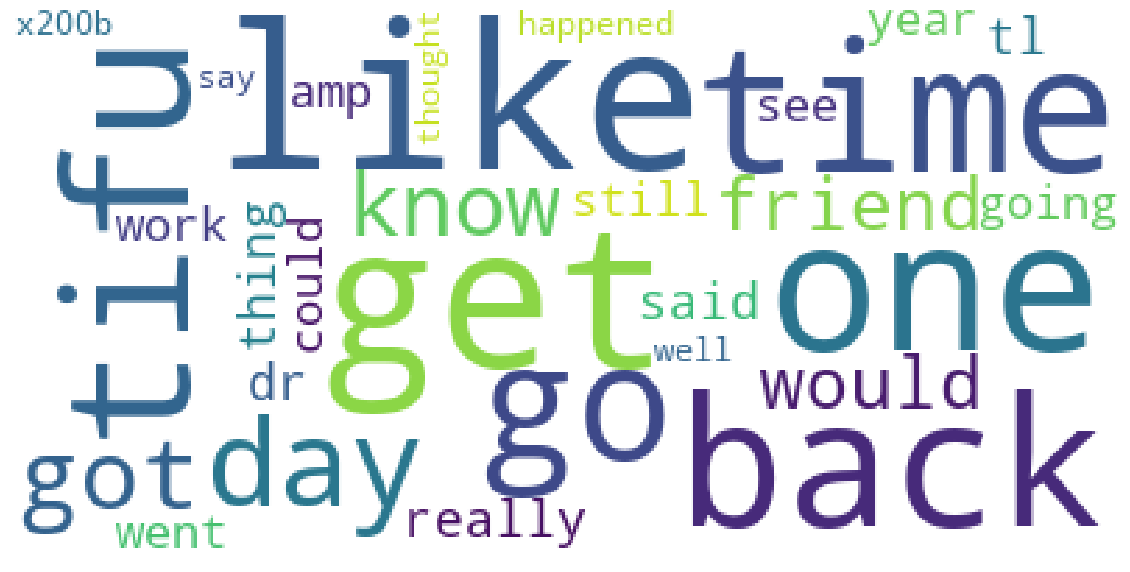

In [21]:
plt.figure(figsize = (20,20), facecolor= None)
plt.imshow(cloud.generate_from_frequencies(tifu_count))
plt.axis('Off')
plt.show()

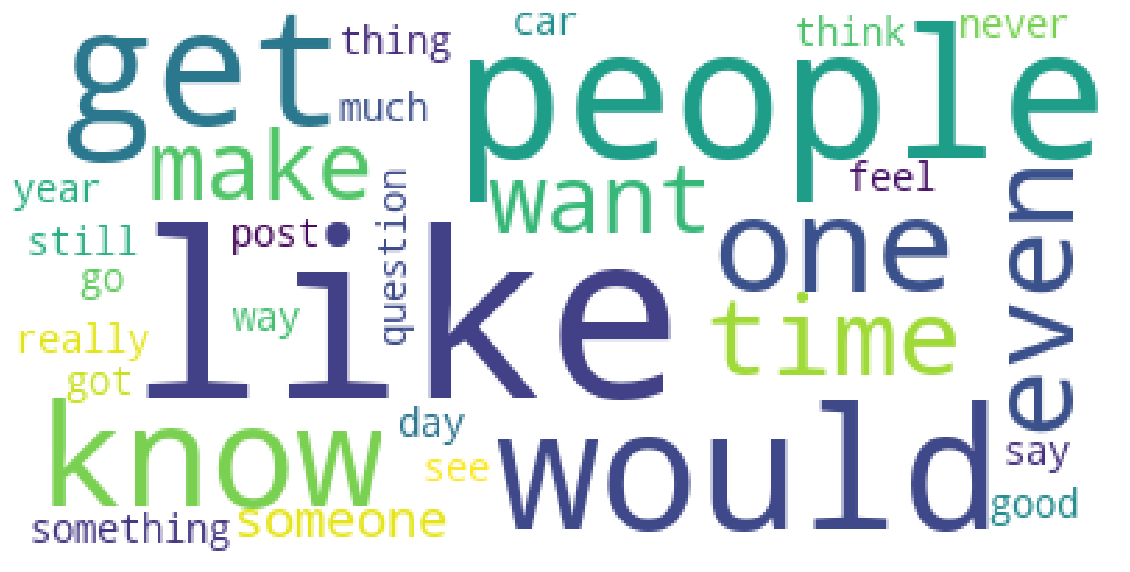

In [22]:
plt.figure(figsize = (20,20), facecolor= None)
plt.imshow(cloud.generate_from_frequencies(nsq_count))
plt.axis('Off')
plt.show()

In [23]:
tifu_count['like']

1989

In [35]:
nsq_count['like']

390

This is the one inherent problem with WordClouds: Scale. They seem the same size, but there are far more from TIFU then NSQ so no matter how you slice it or put them together, the words from TIFU will cast a longer shadow

In [24]:
tifu_count['wife']

549

In [25]:
nsq_count['history']

9

In [26]:
tifu_count['tifu']

1356

In [30]:
nsq_count['people']

315

In [32]:
tifu_count['nsfw']

148

In [33]:
tifu_count['tl']

965

In [34]:
tifu_count['dr']

1003